In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
import seaborn as sns
from sklearn import preprocessing
import joblib
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
datagen = ImageDataGenerator(
        rotation_range = 180,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))
import numpy as np
import os
from PIL import Image
image_directory = r'C:/Users/Rahul Anil Nair/Desktop/good-i/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'C:/Users/Rahul Anil Nair/Desktop/augmented good/',
                          save_prefix='df',
                          save_format='jpg'):
    i += 1
    if i > 137:
        break

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
datagen = ImageDataGenerator(
        rotation_range = 180,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))
import numpy as np
import os
from PIL import Image
image_directory = r'C:/Users/Rahul Anil Nair/Desktop/bad-i/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'C:/Users/Rahul Anil Nair/Desktop/augmented bad/',
                          save_prefix='df',
                          save_format='jpg'):
    i += 1
    if i > 324:
        break

In [ ]:
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 3
EPOCHS = 50
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)

In [ ]:
def training(path) :

    train_images = []
    train_labels = []

    path = path + '\*'
    for directory_path in glob.glob(path) :
        label = directory_path.split('\\')[-1]
        for img_path in glob.glob(os.path.join(directory_path, '*.JPG')) :
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.merge((img, img, img))
            img = cv2.resize(img, (SIZE, SIZE))

            train_images.append(img)
            train_labels.append(label)

    train_data = list(zip(train_images, train_labels))
    random.seed(SEED_TRAINING)
    random.shuffle(train_data)
    train_images, train_labels = zip(*train_data)


    train_images = np.array(train_images)
    train_labels = np.array(train_labels)


    train_images = train_images / 255.0
    return train_images, train_labels

training(r'C:\Users\Rahul Anil Nair\Desktop\train-i')

(array([[[[0.47058824, 0.47058824, 0.47058824],
          [0.37647059, 0.37647059, 0.37647059],
          [0.36862745, 0.36862745, 0.36862745],
          ...,
          [0.22745098, 0.22745098, 0.22745098],
          [0.22745098, 0.22745098, 0.22745098],
          [0.22745098, 0.22745098, 0.22745098]],
 
         [[0.46666667, 0.46666667, 0.46666667],
          [0.45098039, 0.45098039, 0.45098039],
          [0.4       , 0.4       , 0.4       ],
          ...,
          [0.22352941, 0.22352941, 0.22352941],
          [0.22352941, 0.22352941, 0.22352941],
          [0.22352941, 0.22352941, 0.22352941]],
 
         [[0.42352941, 0.42352941, 0.42352941],
          [0.47843137, 0.47843137, 0.47843137],
          [0.45098039, 0.45098039, 0.45098039],
          ...,
          [0.22352941, 0.22352941, 0.22352941],
          [0.22352941, 0.22352941, 0.22352941],
          [0.22352941, 0.22352941, 0.22352941]],
 
         ...,
 
         [[0.18431373, 0.18431373, 0.18431373],
          [0.19215

In [ ]:
def testing(path) :
    test_images = []
    test_labels = []

    path = path + '\*'
    for directory_path in glob.glob(path) :
        labels = directory_path.split('\\')[-1]
        for img_path in glob.glob(os.path.join(directory_path, '*.JPG')) :
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.merge((img, img, img))
            img = cv2.resize(img, (SIZE, SIZE))
            test_images.append(img)
            test_labels.append(labels)


    test_data = list(zip(test_images, test_labels))
    random.seed(SEED_TESTING)
    random.shuffle(test_data)
    test_images, test_labels = zip(*test_data)
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)

    test_images = test_images / 255.0
    return test_images, test_labels
testing(r'C:\Users\Rahul Anil Nair\Desktop\test-i')

(array([[[[0.30196078, 0.30196078, 0.30196078],
          [0.45098039, 0.45098039, 0.45098039],
          [0.41568627, 0.41568627, 0.41568627],
          ...,
          [0.32941176, 0.32941176, 0.32941176],
          [0.30196078, 0.30196078, 0.30196078],
          [0.12941176, 0.12941176, 0.12941176]],
 
         [[0.3254902 , 0.3254902 , 0.3254902 ],
          [0.34901961, 0.34901961, 0.34901961],
          [0.41960784, 0.41960784, 0.41960784],
          ...,
          [0.29803922, 0.29803922, 0.29803922],
          [0.14509804, 0.14509804, 0.14509804],
          [0.22352941, 0.22352941, 0.22352941]],
 
         [[0.2745098 , 0.2745098 , 0.2745098 ],
          [0.54509804, 0.54509804, 0.54509804],
          [0.41568627, 0.41568627, 0.41568627],
          ...,
          [0.24313725, 0.24313725, 0.24313725],
          [0.4627451 , 0.4627451 , 0.4627451 ],
          [0.41568627, 0.41568627, 0.41568627]],
 
         ...,
 
         [[0.17647059, 0.17647059, 0.17647059],
          [0.22352

# VGG16 WITH XGBOOST

{'bad': 0, 'good': 1}
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64,

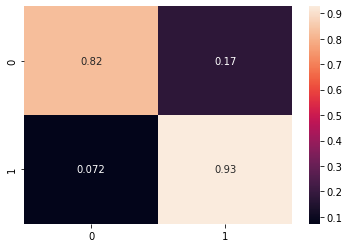

In [ ]:
X_train, y_train_labels = training(r'C:\Users\Rahul Anil Nair\Desktop\train-i')
X_test, y_test_labels = testing(r'C:\Users\Rahul Anil Nair\Desktop\test-i')

le = preprocessing.LabelEncoder()
le.fit(y_train_labels)
train_label_encoded = le.transform(y_train_labels)
le.fit(y_test_labels)
test_label_encoded = le.transform(y_test_labels)

labels = dict(zip(le.classes_,range(len(le.classes_))))
print(labels)

y_train, y_test = train_label_encoded, test_label_encoded

vgg_model = VGG16(weights = 'imagenet',  include_top = False, input_shape = (SIZE, SIZE, 3))

for layer in vgg_model.layers :
    layer.trainable = True

vgg_model.summary()

feature_extractor = vgg_model.predict(X_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_train_features = features

feature_extractor_test = vgg_model.predict(X_test)
features_test = feature_extractor_test.reshape(feature_extractor_test.shape[0], -1)
X_test_features = features_test

model1 = xgb.XGBClassifier()
model1.fit(X_train_features, y_train)
prediction = model1.predict(X_test_features)

prediction = le.inverse_transform(prediction)

print('Accuracy : ', metrics.accuracy_score(y_test_labels, prediction))

cm = confusion_matrix(y_test_labels, prediction)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot = True)

print(classification_report(y_test_labels, prediction))

# RESNET-50 WITH XGBOOST

{'bad': 0, 'good': 1}
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                     

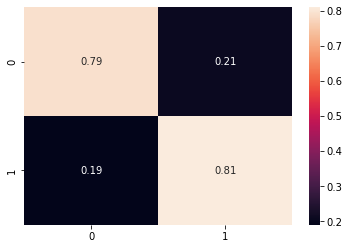

In [ ]:
from keras.applications import ResNet50
X_train, y_train_labels = training(r'C:\Users\Rahul Anil Nair\Desktop\train-i')
X_test, y_test_labels = testing(r'C:\Users\Rahul Anil Nair\Desktop\test-i')

le = preprocessing.LabelEncoder()
le.fit(y_train_labels)
train_label_encoded = le.transform(y_train_labels)
le.fit(y_test_labels)
test_label_encoded = le.transform(y_test_labels)

labels = dict(zip(le.classes_,range(len(le.classes_))))
print(labels)

y_train, y_test = train_label_encoded, test_label_encoded

resnet50_model = ResNet50(weights = 'imagenet',  include_top = False, input_shape = (SIZE, SIZE, 3))

for layer in resnet50_model.layers :
    layer.trainable = True

resnet50_model.summary()

feature_extractor = resnet50_model.predict(X_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_train_features = features

feature_extractor_test = resnet50_model.predict(X_test)
features_test = feature_extractor_test.reshape(feature_extractor_test.shape[0], -1)
X_test_features = features_test

model2 = xgb.XGBClassifier()
model2.fit(X_train_features, y_train)
prediction = model2.predict(X_test_features)

prediction = le.inverse_transform(prediction)

print('Accuracy : ', metrics.accuracy_score(y_test_labels, prediction))

cm = confusion_matrix(y_test_labels, prediction)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot = True)

print(classification_report(y_test_labels, prediction))

# VGG16 WITH ADABOOST

{'bad': 0, 'good': 1}
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64,

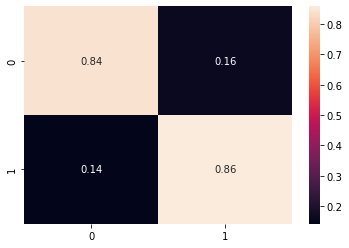

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
X_train, y_train_labels = training(r'C:\Users\Rahul Anil Nair\Desktop\train-i')
X_test, y_test_labels = testing(r'C:\Users\Rahul Anil Nair\Desktop\test-i')

le = preprocessing.LabelEncoder()
le.fit(y_train_labels)
train_label_encoded = le.transform(y_train_labels)
le.fit(y_test_labels)
test_label_encoded = le.transform(y_test_labels)

labels = dict(zip(le.classes_,range(len(le.classes_))))
print(labels)

y_train, y_test = train_label_encoded, test_label_encoded

vgg_model = VGG16(weights = 'imagenet',  include_top = False, input_shape = (SIZE, SIZE, 3))

for layer in vgg_model.layers :
    layer.trainable = True

vgg_model.summary()

feature_extractor = vgg_model.predict(X_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_train_features = features

feature_extractor_test = vgg_model.predict(X_test)
features_test = feature_extractor_test.reshape(feature_extractor_test.shape[0], -1)
X_test_features = features_test

model3 = AdaBoostClassifier(n_estimators=100, random_state=0)
model3.fit(X_train_features, y_train)
prediction = model3.predict(X_test_features)

prediction = le.inverse_transform(prediction)

print('Accuracy : ', metrics.accuracy_score(y_test_labels, prediction))

cm = confusion_matrix(y_test_labels, prediction)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot = True)

print(classification_report(y_test_labels, prediction))

# RESNET50 WITH ADABOOST

{'bad': 0, 'good': 1}
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                     

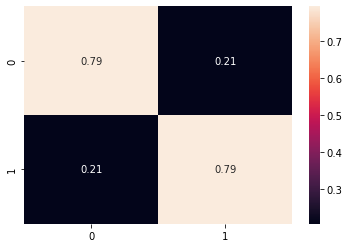

In [ ]:
from keras.applications import ResNet50
from sklearn.ensemble import AdaBoostClassifier
X_train, y_train_labels = training(r'C:\Users\Rahul Anil Nair\Desktop\train-i')
X_test, y_test_labels = testing(r'C:\Users\Rahul Anil Nair\Desktop\test-i')

le = preprocessing.LabelEncoder()
le.fit(y_train_labels)
train_label_encoded = le.transform(y_train_labels)
le.fit(y_test_labels)
test_label_encoded = le.transform(y_test_labels)

labels = dict(zip(le.classes_,range(len(le.classes_))))
print(labels)

y_train, y_test = train_label_encoded, test_label_encoded

resnet50_model = ResNet50(weights = 'imagenet',  include_top = False, input_shape = (SIZE, SIZE, 3))

for layer in resnet50_model.layers :
    layer.trainable = True

resnet50_model.summary()

feature_extractor = resnet50_model.predict(X_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_train_features = features

feature_extractor_test = resnet50_model.predict(X_test)
features_test = feature_extractor_test.reshape(feature_extractor_test.shape[0], -1)
X_test_features = features_test

model4 = AdaBoostClassifier(n_estimators=100, random_state=0)
model4.fit(X_train_features, y_train)
prediction = model4.predict(X_test_features)

prediction = le.inverse_transform(prediction)

print('Accuracy : ', metrics.accuracy_score(y_test_labels, prediction))

cm = confusion_matrix(y_test_labels, prediction)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot = True)

print(classification_report(y_test_labels, prediction))

# VGG19 WITH XGBOOST

{'bad': 0, 'good': 1}
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64,

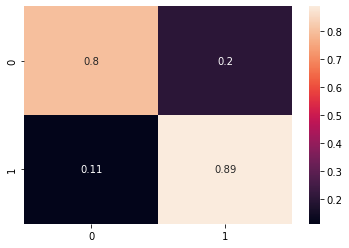

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
X_train, y_train_labels = training(r'C:\Users\Rahul Anil Nair\Desktop\train-i')
X_test, y_test_labels = testing(r'C:\Users\Rahul Anil Nair\Desktop\test-i')

le = preprocessing.LabelEncoder()
le.fit(y_train_labels)
train_label_encoded = le.transform(y_train_labels)
le.fit(y_test_labels)
test_label_encoded = le.transform(y_test_labels)

labels = dict(zip(le.classes_,range(len(le.classes_))))
print(labels)

y_train, y_test = train_label_encoded, test_label_encoded

vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (SIZE, SIZE, 3))

for layer in vgg_model.layers :
    layer.trainable = True

vgg_model.summary()

feature_extractor = vgg_model.predict(X_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)
pca_d=PCA(n_components=4)
features=pca_d.fit_transform(features)
X_train_features = features

feature_extractor_test = vgg_model.predict(X_test)
features_test = feature_extractor_test.reshape(feature_extractor_test.shape[0], -1)
features_test=pca_d.fit_transform(features_test)
X_test_features = features_test

model5 = xgb.XGBClassifier()
model5.fit(X_train_features, y_train)
prediction = model5.predict(X_test_features)

prediction = le.inverse_transform(prediction)

print('Accuracy : ', metrics.accuracy_score(y_test_labels, prediction))

cm = confusion_matrix(y_test_labels, prediction)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot = True)

print(classification_report(y_test_labels, prediction))

# VGG19 WITH ADABOOST

{'bad': 0, 'good': 1}
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64,

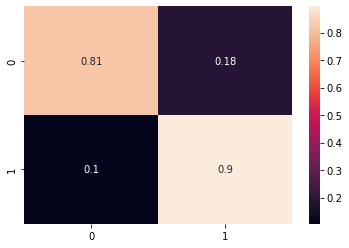

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
X_train, y_train_labels = training(r'C:\Users\Rahul Anil Nair\Desktop\train-i')
X_test, y_test_labels = testing(r'C:\Users\Rahul Anil Nair\Desktop\test-i')

le = preprocessing.LabelEncoder()
le.fit(y_train_labels)
train_label_encoded = le.transform(y_train_labels)
le.fit(y_test_labels)
test_label_encoded = le.transform(y_test_labels)

labels = dict(zip(le.classes_,range(len(le.classes_))))
print(labels)

y_train, y_test = train_label_encoded, test_label_encoded

vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (SIZE, SIZE, 3))

for layer in vgg_model.layers :
    layer.trainable = True

vgg_model.summary()

feature_extractor = vgg_model.predict(X_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_train_features = features

feature_extractor_test = vgg_model.predict(X_test)
features_test = feature_extractor_test.reshape(feature_extractor_test.shape[0], -1)
X_test_features = features_test

model6 = AdaBoostClassifier(n_estimators=100, random_state=0)
model6.fit(X_train_features, y_train)
prediction = model6.predict(X_test_features)

prediction = le.inverse_transform(prediction)

print('Accuracy : ', metrics.accuracy_score(y_test_labels, prediction))

cm = confusion_matrix(y_test_labels, prediction)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot = True)

print(classification_report(y_test_labels, prediction))